In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
 
df=pd.read_csv('D:/GC/test1026.csv')
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [2]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['weekday'] = df.pickup_datetime.dt.day_name()
df['month'] = df.pickup_datetime.dt.month
df['weekday_num'] = df.pickup_datetime.dt.weekday
df['pickup_hour'] = df.pickup_datetime.dt.hour

df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,3,0,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,6,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,1,1,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,4,2,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,3,5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,Friday,4,4,13
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,Sunday,1,6,7
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,Friday,4,4,6
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,Tuesday,1,1,15


In [3]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'weekday', 'month', 'weekday_num', 'pickup_hour'],
      dtype='object')

In [25]:
temp_df.loc[temp_df['weekday']=='Monday',['pickup_hour','passenger_count']]

,pickup_hour,passenger_count
0,17,1
15,15,1
16,17,1
18,9,1
27,23,1
...,...,...
1458614,17,1
1458621,14,1
1458623,20,1
1458625,17,1


In [27]:
temp_df=df.loc[:,['pickup_datetime','dropoff_datetime','weekday','pickup_hour','passenger_count']]
temp_df
count=temp_df.groupby('weekday').count()
count['passenger_count']

weekday
Friday       223533
Monday       187418
Saturday     220868
Sunday       195366
Thursday     218574
Tuesday      202749
Wednesday    210136
Name: passenger_count, dtype: int64

In [4]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
weekday               0
month                 0
weekday_num           0
pickup_hour           0
dtype: int64

In [5]:
count=df.groupby('passenger_count').count()
count['id']

passenger_count
0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: id, dtype: int64

In [6]:
count=df.groupby('pickup_hour').count()
count['id']

pickup_hour
0     53248
1     38571
2     27972
3     20895
4     15792
5     15002
6     33248
7     55600
8     67053
9     67663
10    65437
11    68476
12    71873
13    71473
14    74292
15    71811
16    64313
17    76483
18    90600
19    90308
20    84072
21    84185
22    80492
23    69785
Name: id, dtype: int64

<Axes: xlabel='passenger_count', ylabel='count'>

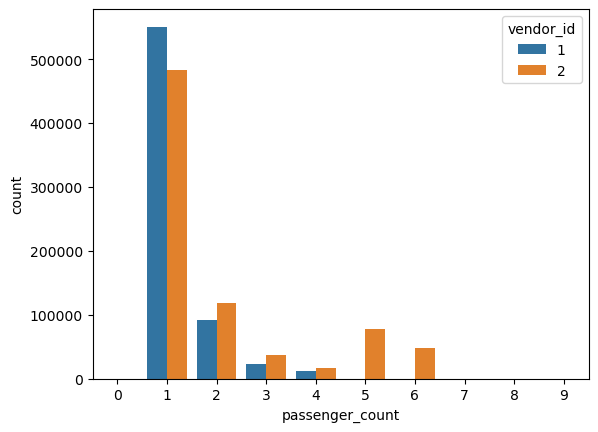

In [7]:
sns.countplot(data=df, x='passenger_count',hue='vendor_id')


In [8]:
# 'pickup_hour', 'passenger_count', 'vendor_id', 'month'로만 구성된 새로운 newdf 구성
new_df=df.loc[:,['pickup_hour', 'passenger_count', 'vendor_id', 'month']]
new_df

,pickup_hour,passenger_count,vendor_id,month
0,17,1,2,3
1,0,1,1,6
2,11,1,2,1
3,19,1,2,4
4,13,1,2,3
...,...,...,...,...
1458639,13,4,2,4
1458640,7,1,1,1
1458641,6,1,2,4
1458642,15,1,1,1


<Axes: title={'center': '8×8 Heat Map Graph'}>

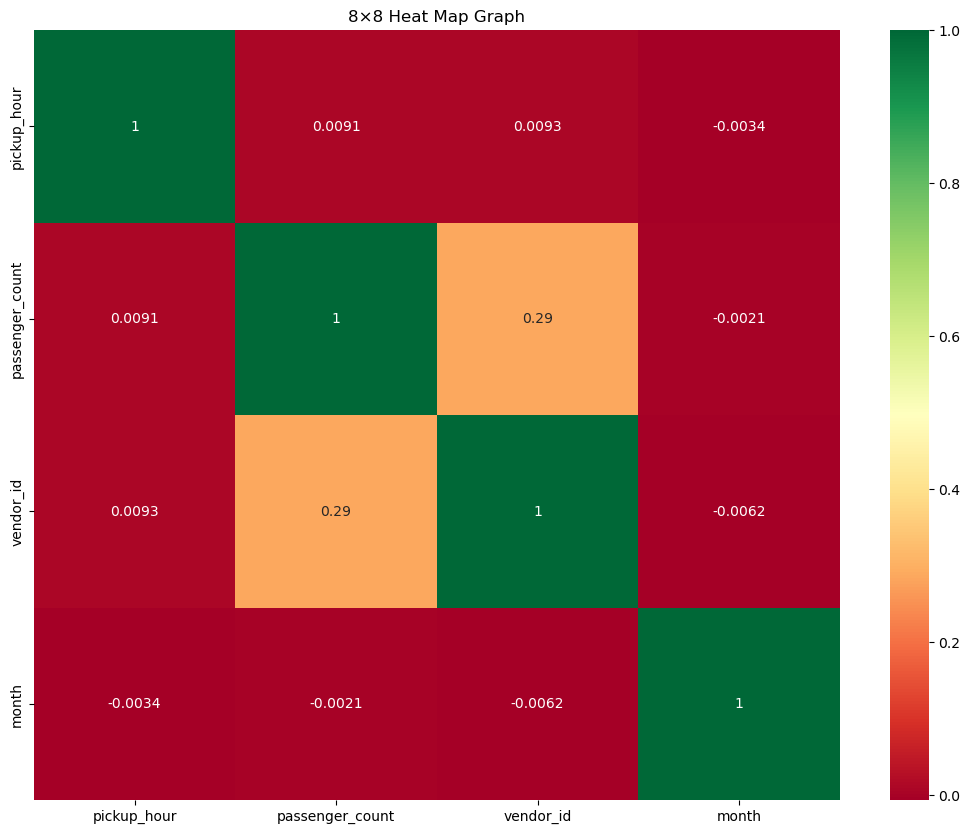

In [28]:
#newdf의 히트맵 작성

plt.figure(figsize=(13,10))
plt.title('8×8 Heat Map Graph')

correlation_df= new_df.corr()


sns.heatmap(correlation_df, annot=True, cmap='RdYlGn')

In [10]:
# 승객이 0인 픽업 위도경도 로 구성된 zeropickup 생성 pickup_longitude	pickup_latitude
zeropickup=df.loc[df['passenger_count']==0,['pickup_longitude','pickup_latitude']]
zeropickup.head()


,pickup_longitude,pickup_latitude
62744,-73.776367,40.645248
136519,-73.993134,40.757473
194288,-73.946243,40.772903
217765,-73.815224,40.700081
263809,-73.861633,40.705029


In [11]:
zerodropoff=df.loc[df['passenger_count']==0,['dropoff_longitude','dropoff_latitude']]
zerodropoff.head()

,dropoff_longitude,dropoff_latitude
62744,-73.776360,40.645260
136519,-73.993294,40.757538
194288,-73.946770,40.774841
217765,-73.950699,40.755222
263809,-73.861633,40.705029


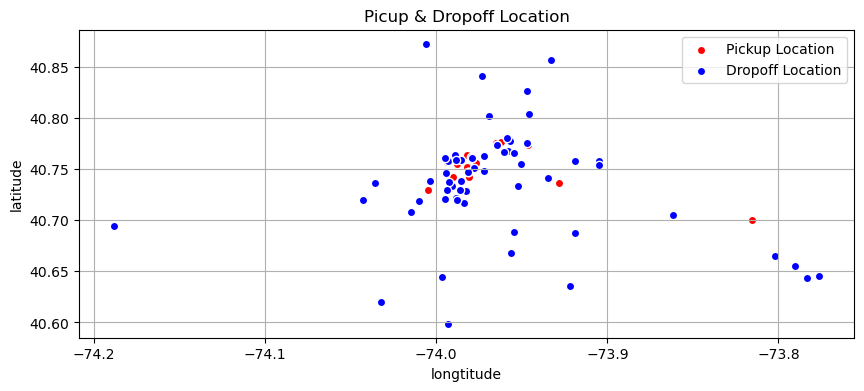

In [12]:
# 픽업가 드롭에 따른 위도경도 산점도 작성

plt.figure(figsize=(10,4))
plt.scatter(zeropickup['pickup_longitude'],zeropickup['pickup_latitude'],color='r',edgecolor='w',label='Pickup Location')
plt.scatter(zerodropoff['dropoff_longitude'],zerodropoff['dropoff_latitude'],color='b',edgecolor='w',label='Dropoff Location')

plt.xlabel('longtitude')
plt.ylabel('latitude')
plt.title('Picup & Dropoff Location')
plt.legend()
plt.grid()
plt.show()

In [13]:
# 승객수가 4명인 픽업의 위도와 경도, 승객수
fourpickup=df.loc[df['passenger_count']==4,['pickup_longitude','pickup_latitude','passenger_count']]
fourpickup.head()

,pickup_longitude,pickup_latitude,passenger_count
6,-73.969017,40.757839,4
11,-73.991531,40.749439,4
61,-73.976952,40.752022,4
107,-73.975807,40.760628,4
154,-74.006706,40.705555,4


In [14]:
# 4시에 드롭한 위도와 경도, 승객수, 픽업시간
fourdropoff=df.loc[df['pickup_hour']==4,['dropoff_longitude','dropoff_latitude','passenger_count','pickup_hour']]
fourdropoff.head()

,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour
169,-73.910530,40.709492,3,4
255,-73.945961,40.711437,1,4
301,-73.982605,40.757504,2,4
313,-73.960709,40.797470,1,4
423,-73.937622,40.698074,1,4


In [15]:
#'passenger_count', 'trip_duration', 'month', 'weekday', 'pickup_hour'로 구성된 data6 생성
data6=df.loc[:,['passenger_count', 'trip_duration', 'month', 'weekday', 'pickup_hour']]
data6.month.value_counts()

3    256189
4    251645
5    248487
2    238300
6    234316
1    229707
Name: month, dtype: int64

In [16]:
hist1=data6.loc[data6['month']==1,['passenger_count','weekday']]
hist2=data6.loc[data6['month']==5,['passenger_count','weekday']]

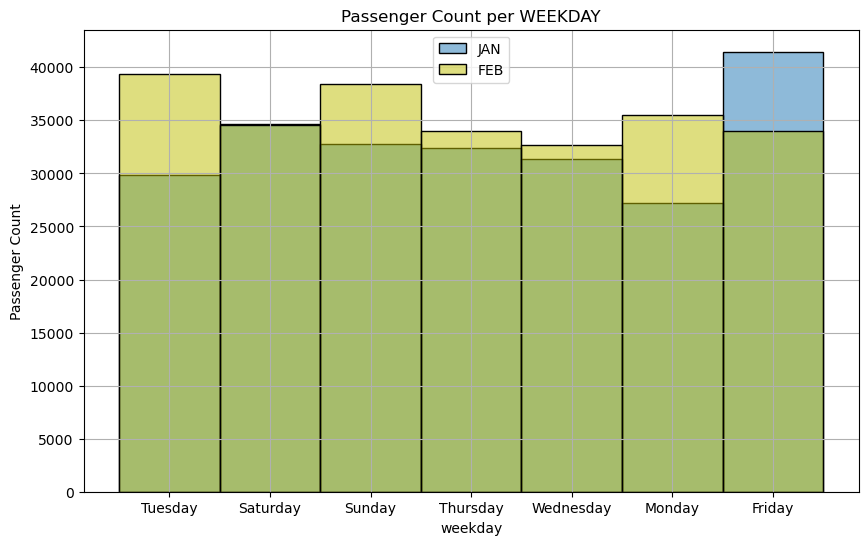

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(hist1['weekday'],bins=8,alpha=0.5,label='JAN')
sns.histplot(hist2['weekday'],bins=8,alpha=0.5,label='FEB',color='y')
    
plt.xlabel('weekday')
plt.ylabel('Passenger Count')
plt.title('Passenger Count per WEEKDAY')
plt.legend()
plt.grid()
plt.show()

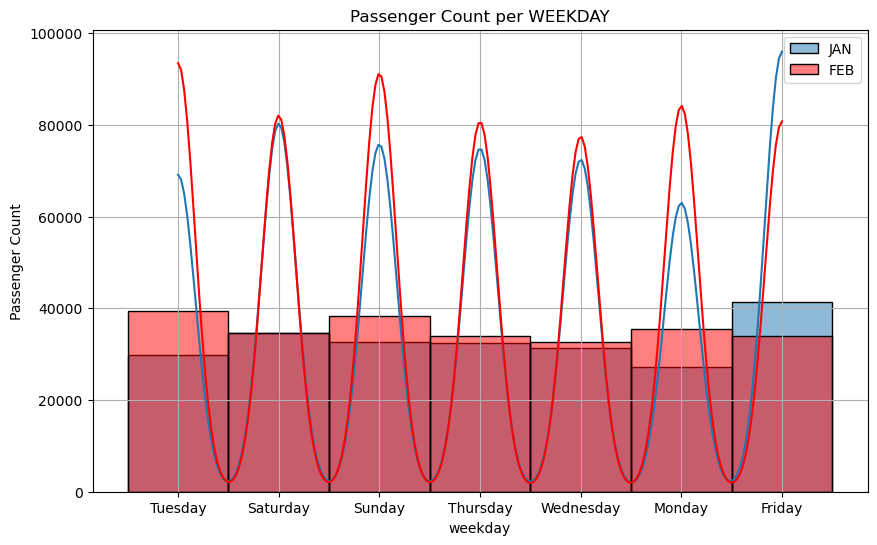

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(hist1['weekday'],bins=8,alpha=0.5,label='JAN', kde=True)
sns.histplot(hist2['weekday'],bins=8,alpha=0.5,label='FEB',color='r', kde=True)
    
plt.xlabel('weekday')
plt.ylabel('Passenger Count')
plt.title('Passenger Count per WEEKDAY')
plt.legend()
plt.grid()
plt.show()

In [19]:
data6.head()

,passenger_count,trip_duration,month,weekday,pickup_hour
0,1,455,3,Monday,17
1,1,663,6,Sunday,0
2,1,2124,1,Tuesday,11
3,1,429,4,Wednesday,19
4,1,435,3,Saturday,13


In [20]:
jan=data6.loc[data6['month']==1,['passenger_count','weekday']]
jan

,passenger_count,weekday
2,1,Tuesday
5,6,Saturday
34,1,Saturday
36,3,Tuesday
46,1,Sunday
...,...,...
1458623,1,Monday
1458625,1,Monday
1458626,2,Sunday
1458640,1,Sunday


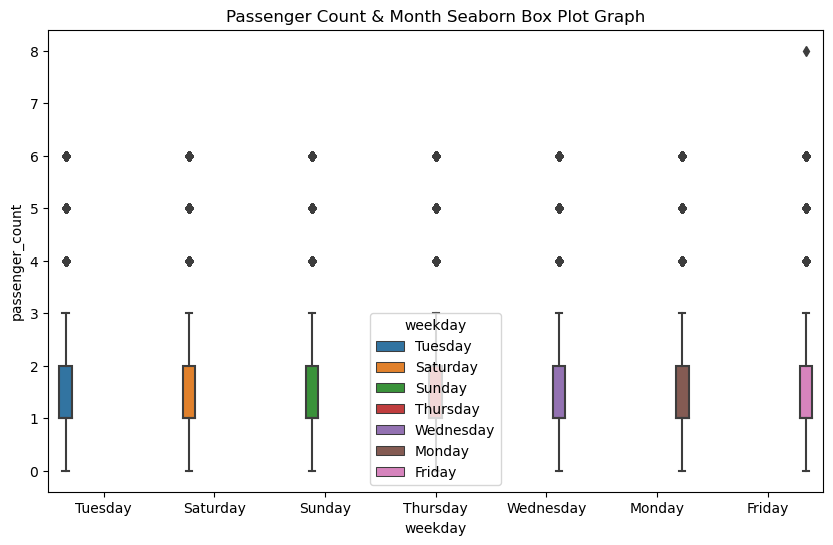

In [21]:
# 1월만 선별

# 요일별 승객수 표시
plt.figure(figsize=(10,6))
plt.title('Passenger Count & Month Seaborn Box Plot Graph')

sns.boxplot(x='weekday',y='passenger_count',hue='weekday',data=jan)
plt.show()